# Background extraction

In [2]:
%matplotlib inline
from pylab import *
rcParams['figure.figsize'] = 16, 6
import numpy as np
import cv2
import ipywidgets

Let's load a video from YouTube

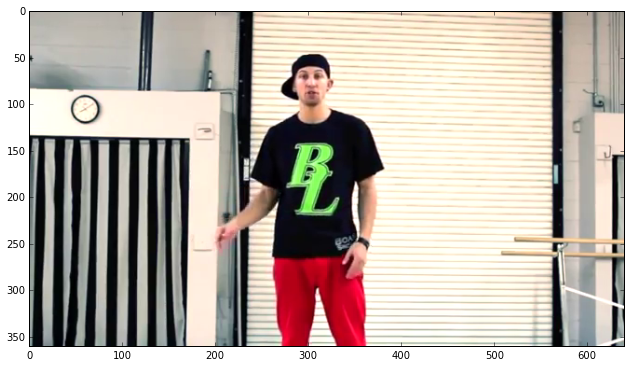

In [24]:
video_capture = cv2.VideoCapture(r'http://r19---sn-4g57knks.googlevideo.com/videoplayback?sver=3&lmt=1416611349572079&sparams=dur,expire,id,initcwndbps,ip,ipbits,itag,lmt,mime,mm,mn,ms,mv,nh,pl,ratebypass,source,upn&expire=1452785239&ipbits=0&itag=18&upn=OErG1jELeoU&source=youtube&signature=1F7CF0E8EA9FC1217375ED7F0EEB92FF26526C4C.1D172FD52D454A20C4C06D036597751FEF1053C0&key=cms1&mime=video%2Fmp4&ratebypass=yes&pl=22&dur=176.843&id=1ce3bcc5f1339e00&ip=62.219.209.20&fexp=9416075%2C9416126%2C9418201%2C9420452%2C9422147%2C9422540%2C9422596%2C9423282%2C9423487%2C9423662%2C9424822%2C9424845%2C9424978%2C9425415%2C9426176%2C9427016&title=HAND+WAVING+Tutorial+(Advanced)+-+How+To+WAVE+w-+%40MattSteffanina+-+Hip+Hop+Moves&redirect_counter=1&req_id=cda7be68fdfea3ee&cms_redirect=yes&mm=30&mn=sn-4g57knks&ms=nxu&mt=1452775738&mv=m&nh=IgpwcjAxLmZyYTAzKgkxMjcuMC4wLjE')
video_capture.set(1, 1000) # skip the first 1000 frames
video_frames = []
for i in range(300):
    state, img = video_capture.read()
    if not state:
        break
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    video_frames.append(img)
   
imshow(video_frames[0])

... and subtract background:

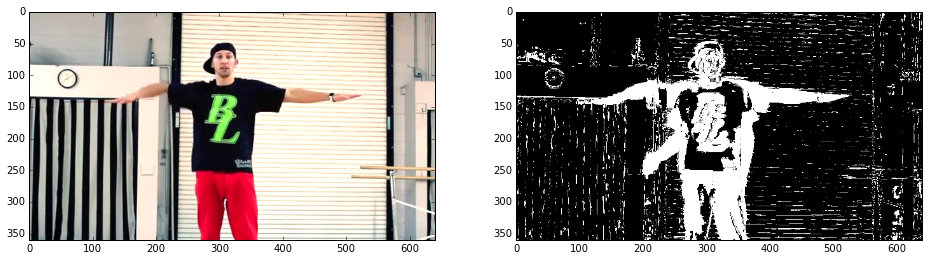

In [25]:
bs = cv2.BackgroundSubtractorMOG2(history=100, varThreshold=16, bShadowDetection=True)

# Set all sorts of parameters
# bs.setDouble('backgroundRatio', 0.7) # minimal ratio of probabilities of background modes
bs.setInt('nmixtures', 7) # number of modes
bs.setDouble('varThresholdGen', 9.) # threshold on the squared Mahalan. dist. to decide when a sample is
    # close to the existing components. If it is not close to any a new component will be generated. 
bs.setDouble('fCT', 0) # this is related to the number of samples needed to accept that a component actually exists. 
    # The default is CT=0.05 of all the samples.


fg_frames = []
for i in range(len(video_frames)):
    fg = bs.apply(video_frames[i]) # feed frames to background subtractor
    fg_frames.append(fg)

def show_frame(ind):
    f, (ax1, ax2) = subplots(1, 2)
    ax1.imshow(video_frames[ind])
    ax2.imshow(fg_frames[ind])
    gray()
    draw()
    
ipywidgets.interact(show_frame, ind=(0,len(fg_frames)-1), continuous_update=False)

Following is the full list of parameters:

In [26]:
print bs.getParams()

['backgroundRatio', 'detectShadows', 'fCT', 'fTau', 'fVarInit', 'fVarMax', 'fVarMin', 'history', 'nShadowDetection', 'nmixtures', 'varThreshold', 'varThresholdGen']
